In [7]:
from google.colab import drive
import pandas as pd

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/data/earthquake.txt')

In [10]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [11]:
df.shape

(16300, 21)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mpl_toolkits.basemap import Basemap

In [4]:
import warnings
import matplotlib.cbook 

In [5]:
# here the dataset contains all the unnecessary features.
#lets do some fetaure selection

In [12]:
data = df[['Date','Time','Latitude','Longitude','Depth','Magnitude']]

In [13]:
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [14]:
data.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

In [15]:
# no value of the consideared data is missing.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16300 non-null  object 
 1   Time       16300 non-null  object 
 2   Latitude   16300 non-null  float64
 3   Longitude  16300 non-null  float64
 4   Depth      16300 non-null  float64
 5   Magnitude  16300 non-null  float64
dtypes: float64(4), object(2)
memory usage: 764.2+ KB


In [17]:
# we perform the scaling of the data.
#Here, we convert the data time to unix time in seconds

In [27]:
import datetime
import time


# Below is the text code which shows how i converted the date time into unix time .

In [35]:
#date_example = data['Date'][0] +', ' + data['Time'][0]

In [36]:
#date_example

'01/02/1965, 13:44:18'

In [37]:
#date_format = datetime.datetime.strptime(date_example,
                                         "%m/%d/%Y, %H:%M:%S")

In [38]:
#unix_time = datetime.datetime.timestamp(date_format)
#print(unix_time)

-157630542.0


In [40]:
timestamp = []
for i in range(0,len(data)):
  try:
    date_example = data['Date'][i] +', ' + data['Time'][i]
    date_format = datetime.datetime.strptime(date_example,
                                         "%m/%d/%Y, %H:%M:%S")
    unix_time = datetime.datetime.timestamp(date_format)
    timestamp.append(unix_time)
  except ValueError:
    timestamp.append('ValueError')


In [41]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
df1= data.drop(['Date', 'Time'], axis=1)
df1 = df1[df1.Timestamp != 'ValueError']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-1.57631e+08
1,1.863,127.352,80.0,5.8,-1.57466e+08
2,-20.579,-173.972,20.0,6.2,-1.57356e+08
3,-59.076,-23.557,15.0,5.8,-1.57094e+08
4,11.938,126.427,15.0,5.8,-1.57026e+08


In [42]:
df1.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-1.57631e+08
1,1.863,127.352,80.0,5.8,-1.57466e+08
2,-20.579,-173.972,20.0,6.2,-1.57356e+08
3,-59.076,-23.557,15.0,5.8,-1.57094e+08
4,11.938,126.427,15.0,5.8,-1.57026e+08


In [45]:
df1.shape

(16298, 5)

Lets perform Data Visualisation


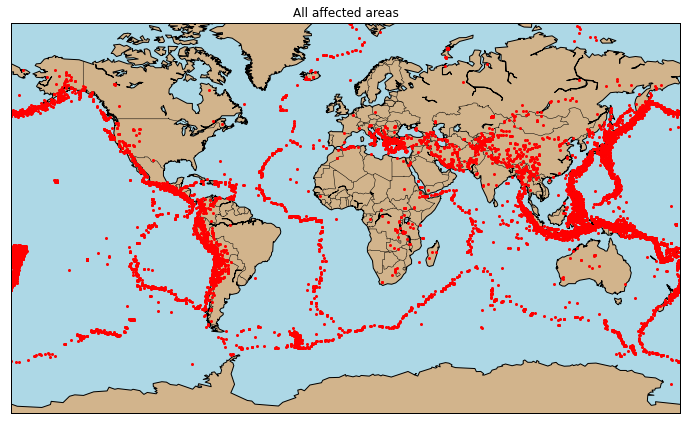

In [53]:
from mpl_toolkits.basemap import Basemap
mapp= Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
x,y = mapp(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
mapp.plot(x, y, "o", markersize = 2, color = 'red')
mapp.drawcoastlines()
plt.title("All affected areas")
mapp.fillcontinents(color='tan',lake_color='lightblue')
mapp.drawmapboundary(fill_color='lightblue')
mapp.drawcountries()
plt.show()

In [54]:
# The above figure gives the coordinates or places where the earth quakes
# the above figure shows most of the earthquakes are occuring at earthquakes.

#Lets split the data

In [74]:
X = df1[['Timestamp', 'Latitude', 'Longitude','Depth']]
y = df1['Magnitude']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


In [75]:
X_train.shape

(10919, 4)

In [76]:
X_test.shape

(5379, 4)

In [77]:
y_train.shape

(10919,)

In [78]:
y_test.shape

(5379,)

# Model Creation 1


In [89]:
X_final = np.array(X)
y_final = np.array(y)




In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=101)


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = []
mse = []
trees = [50,100,120,150,200]
for i in range (0,5):
  model = RandomForestRegressor(n_estimators = trees[i],max_depth = 3,criterion = 'mae')
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  error1 = mean_absolute_error(y_test,y_pred)
  mae.append(error1)
  error2 = mean_squared_error(y_test,y_pred)
  mse.append(error2)



In [93]:
mae

[0.28325402491169394,
 0.28341885108756293,
 0.28357066833984046,
 0.2832002664683656,
 0.28340878880832987]

In [94]:
mse

[0.1828111963487643,
 0.1825247996579298,
 0.18283260823179381,
 0.18267088480448526,
 0.18249019958693247]

In [95]:
ac =[]
for i in range(0,5):
  accuracy_score = 1-mae[i]
  ac.append(accuracy_score)
  

In [96]:
ac

[0.7167459750883061,
 0.7165811489124371,
 0.7164293316601595,
 0.7167997335316344,
 0.7165912111916701]

In [97]:
# since the accuracy scores are very low we use the boosting techniques to improve the accuracy scores.

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [110]:
def boost_models(x):
    #transforming target variable through quantile transformer
    model= x
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, y_pred),3), round(mean_absolute_error(y_test, y_pred),2), round(np.sqrt(mean_squared_error(y_test, y_pred)),2)


In [111]:
algo=[GradientBoostingRegressor(),LGBMRegressor(),XGBRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

[11:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.053,0.3,0.41
1,LGBMRegressor,0.056,0.3,0.41
2,XGBRegressor,0.058,0.3,0.41


In [113]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [114]:
params ={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.1,0.2,0.3,0.4]
}

In [118]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()

In [120]:
grid = GridSearchCV(xgb1,params,n_jobs=-1,cv=3,verbose=3)

In [121]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.6min finished


[12:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 

In [122]:
grid.best_score_

0.04475621943133353

In [123]:
grid.best_params_

{'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3}

In [126]:
xgb2 = XGBRegressor(gamma = 0.4, learning_rate = 0.1, max_depth = 4, min_child_weight = 3)

In [128]:
xgb2.fit(X_train,y_train)
y_pred = xgb2.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)

[12:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [129]:
mae

0.3018428259291244